In [18]:
# this notebook is a adaptation of example found in sci-kitlearn
# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection
#.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py

import pandas as pd
import numpy as np
import itertools
from sklearn import preprocessing
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

from sklearn import mixture

print(__doc__)

def generate_columns(number_of_functions):
    return ['f' + str(i + 1) for i in range(number_of_functions)]

Automatically created module for IPython interactive environment


In [35]:
#### Loading random solutions and preparing data
data = pd.read_csv('SOLUTIONS.csv',encoding='utf-8',sep='|',header=None)
data = data.drop(data.shape[1] - 1,axis = 1)
data.columns = generate_columns(data.shape[1])

#### Slicing the dataframe
n_components = 4 #data.shape[1]
X = data.values
X = data.iloc[:100,:n_components]
columns = X.columns
X = X

In [36]:
# Creating the model
lowest_bic = np.infty
bic = []
n_components_range = range(1, n_components)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type, reg_covar=1e-04)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

ValueError: expected square matrix

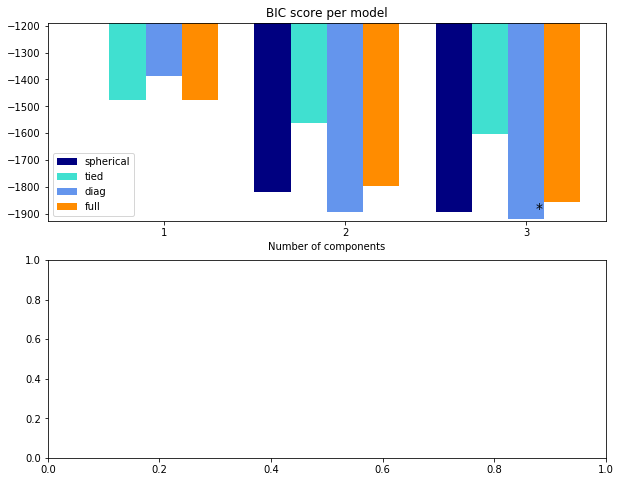

In [37]:
# Plot the BIC scores
plt.figure(figsize=(10, 8))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()